<a href="https://colab.research.google.com/github/iuliivasilev/ML-AI_CS2022/blob/main/MLCourse3SGDExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import pandas as pd
import numpy as np

from sklearn.metrics import hinge_loss, log_loss

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [146]:
def get_iter(size):
    np.random.seed(0)
    for i in range(50):
        yield np.random.randint(size)

# SGDClassifier

In [147]:
# scikit-learn: https://www.adeveloperdiary.com/data-science/how-to-visualize-gradient-descent-using-contour-plot-in-python/
# torch: https://d2l.ai/chapter_optimization/sgd.html

def plot_sgd_decision(model, X):
    X1_max, X2_max = X.max(axis=0)
    X1_min, X2_min = X.min(axis=0)
    xx1 = np.linspace(X1_min - 0.5, X1_max + 0.5, 20)
    xx2 = np.linspace(X2_min - 0.5, X2_max + 0.5, 20)

    X1, X2 = np.meshgrid(xx1, xx2)
    Z = np.empty(X1.shape)
    for (i, j), val in np.ndenumerate(X1):
        x1 = val
        x2 = X2[i, j]
        p = model.decision_function([[x1, x2]])
        Z[i, j] = p[0]

    levels = [0.0]
    colors = "k"
    plt.contour(X1, X2, Z, levels, colors=colors)

def plot_trace(X, y, wei):
    w1_max, w2_max = wei.max(axis=0)
    w1_min, w2_min = wei.min(axis=0)
    w0 = np.linspace(w1_min - 0.5, w1_max + 0.5, 20)
    w1 = np.linspace(w2_min - 0.5, w2_max + 0.5, 20)

    X1, X2 = np.meshgrid(w0, w1)

    vals = np.zeros(shape=(w0.size, w1.size))

    for i, value1 in enumerate(w0):
        for j, value2 in enumerate(w1):
            w_temp = np.array([[value1, value2]])
            vals[i, j] = hinge_loss(y, np.dot(X, w_temp.T)[:,0])

    cp = plt.contour(X1, X2, vals.T, colors='black', linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1, fontsize=10)
    cp = plt.contourf(X1, X2, vals.T, alpha=0.7)
    plt.plot(wei[:, 0], wei[:, 1], linewidth=2.0, marker='.', color="red")
    plt.scatter(wei[[-1], 0], wei[[-1], 1], marker='*', color="red", s=100)
    plt.xlabel("W0")
    plt.ylabel("W1")
    plt.show()

In [148]:
from sklearn.datasets import make_blobs, make_classification
# X, y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=0)
X, y = make_classification(n_samples=200, n_classes=2, n_features=2, n_redundant=0, random_state=0)

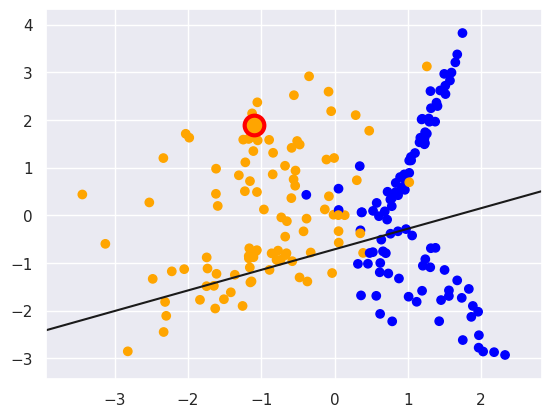

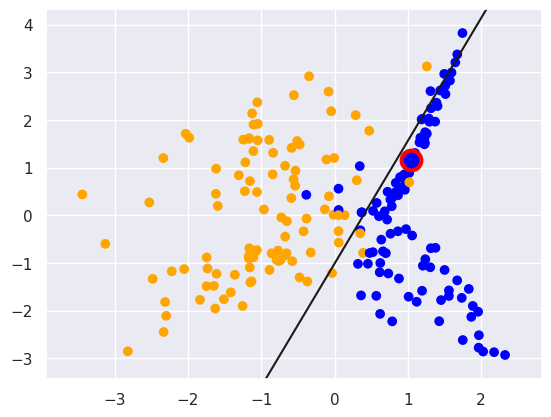

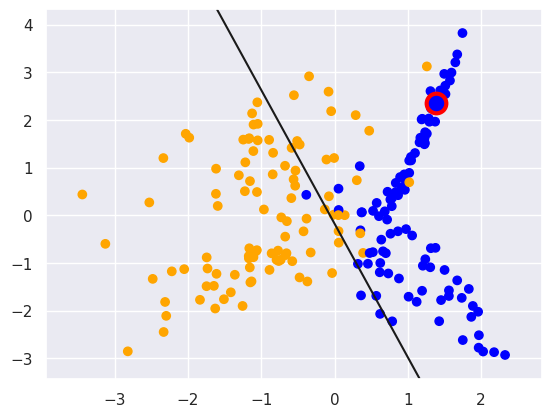

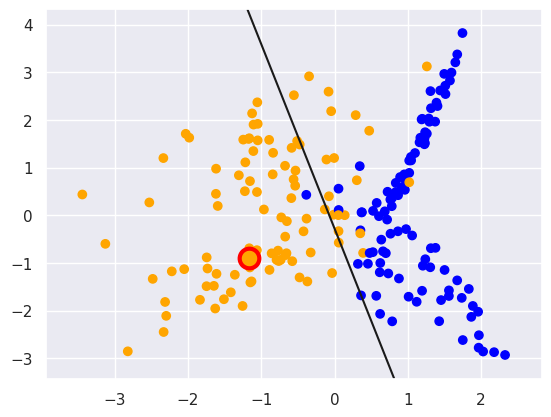

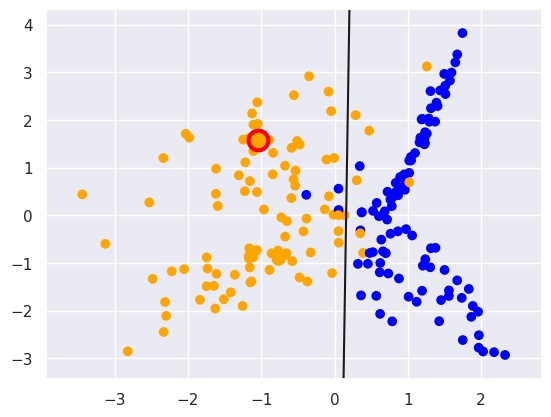

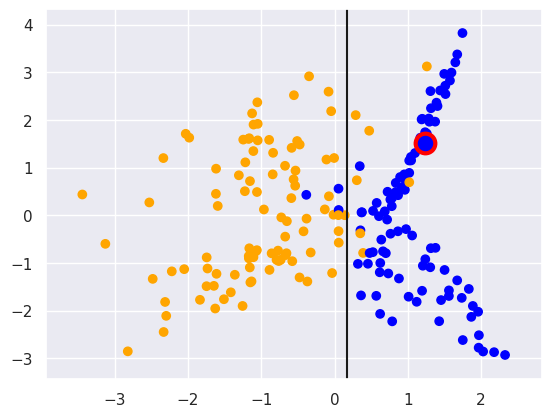

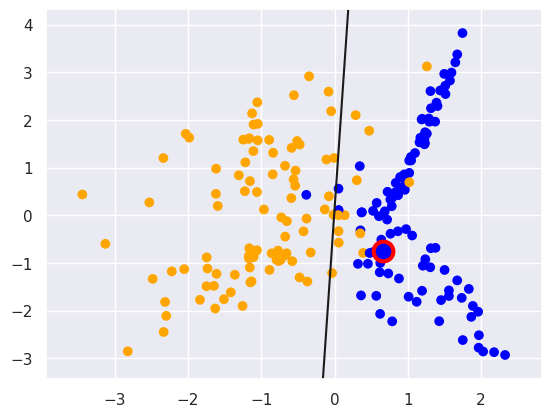

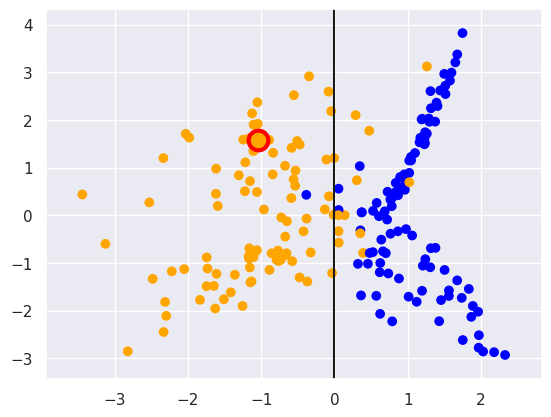

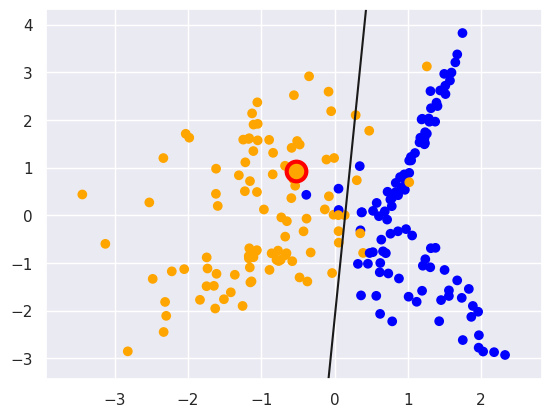

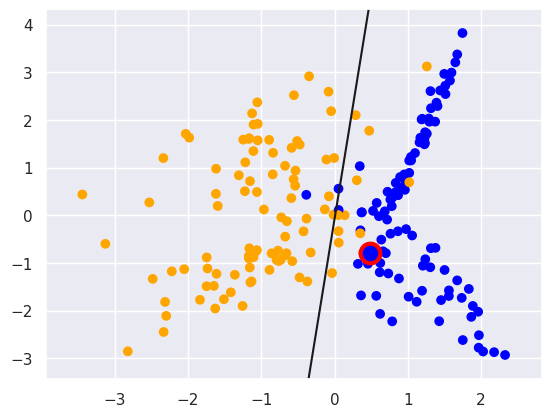

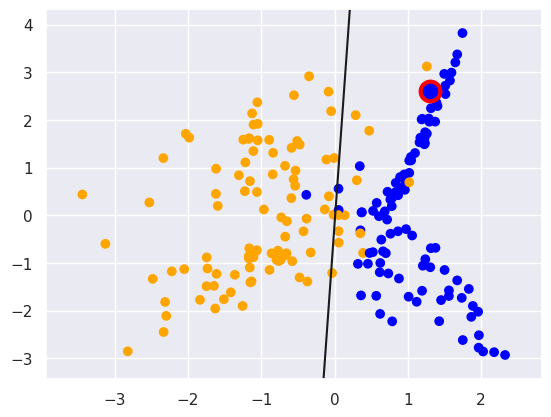

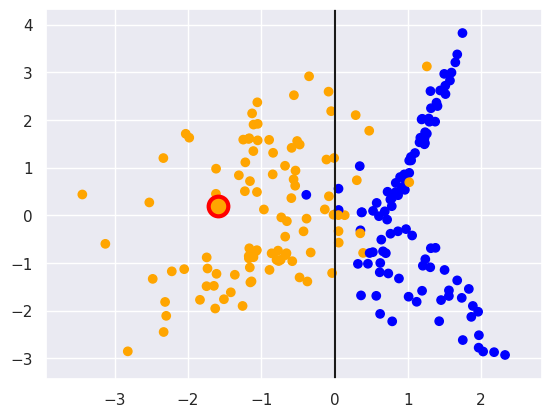

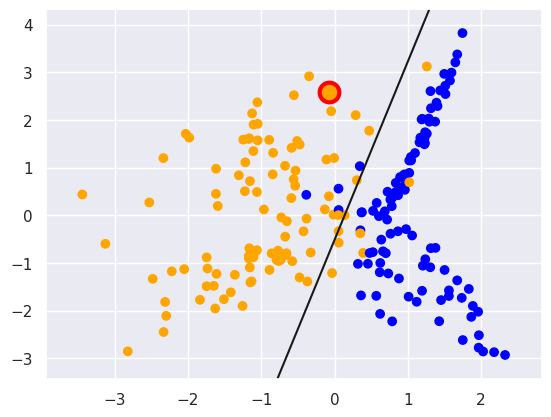

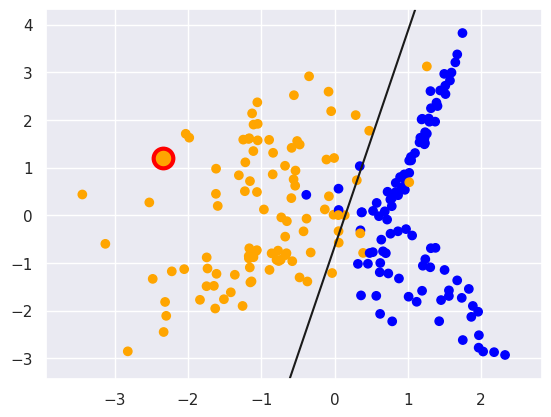

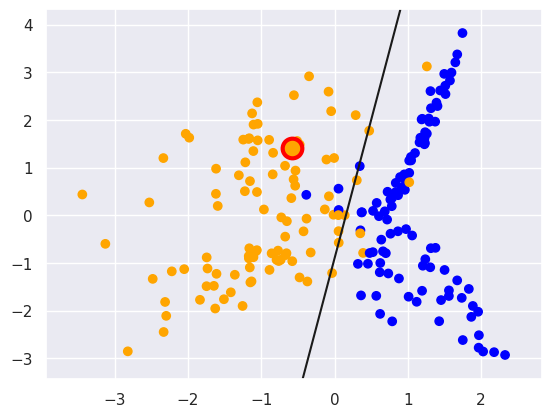

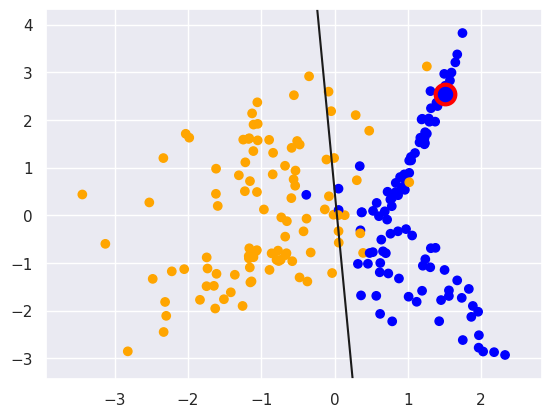

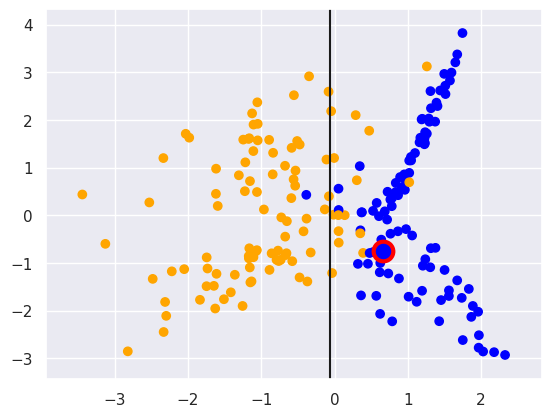

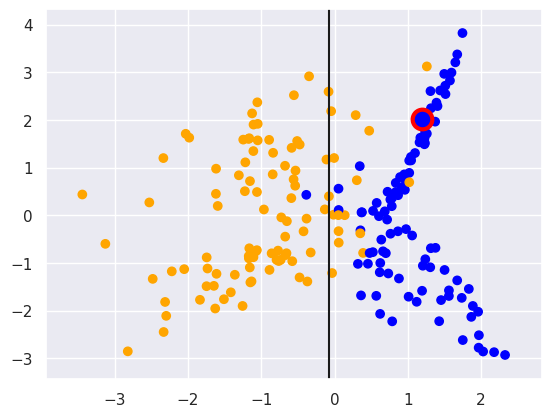

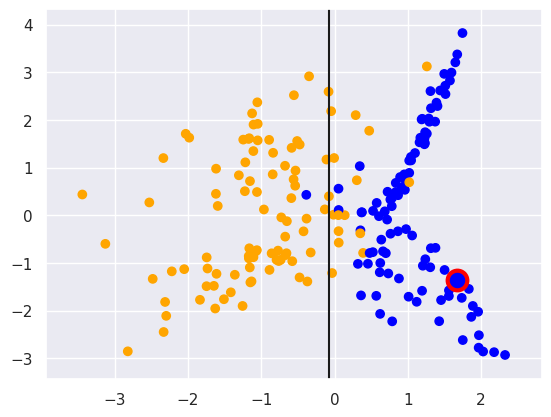

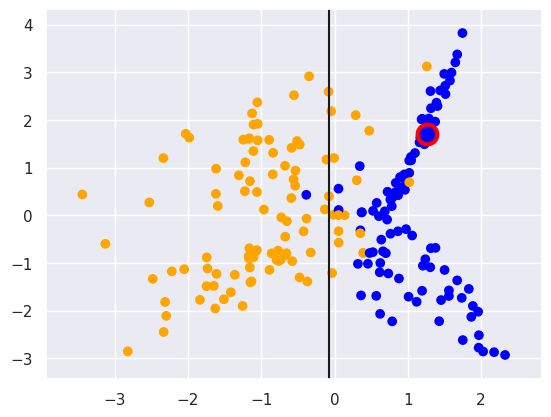

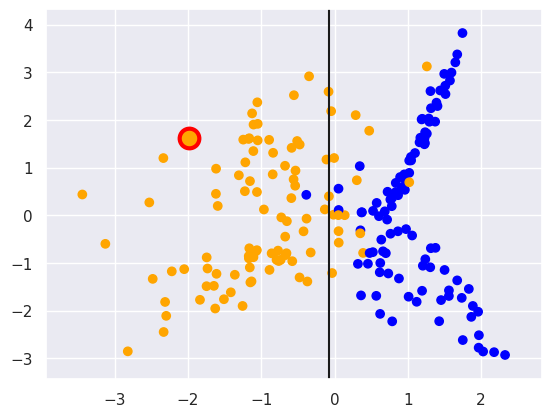

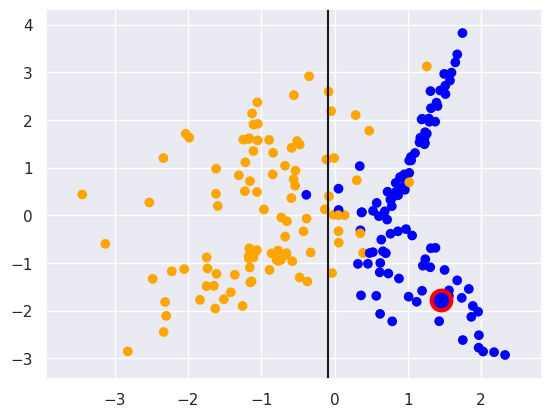

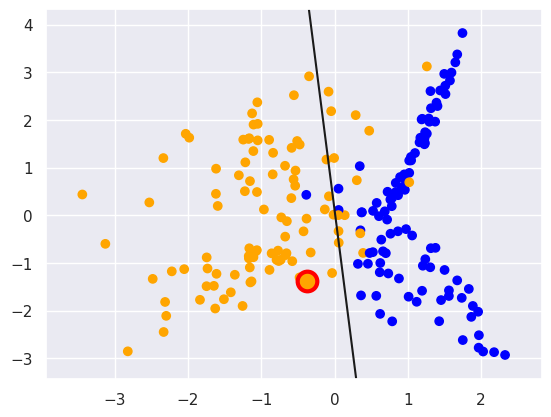

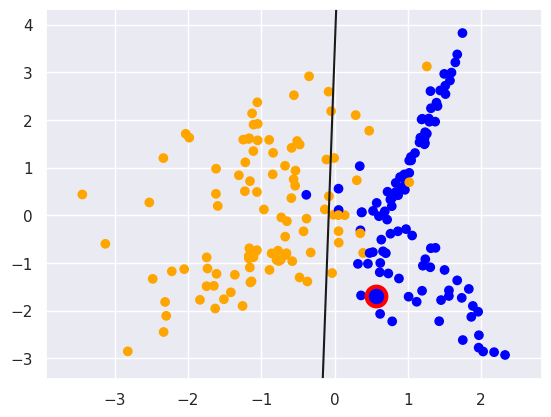

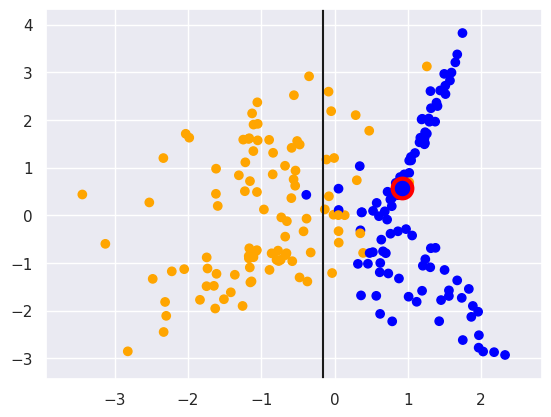

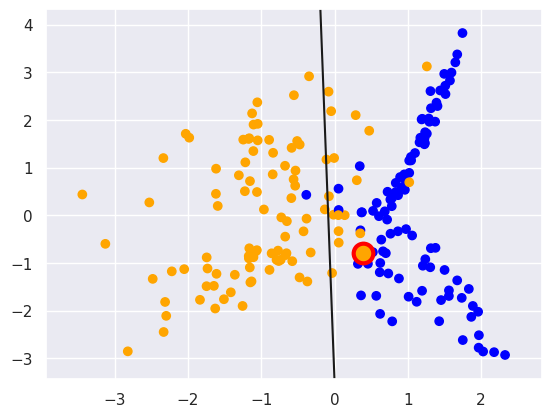

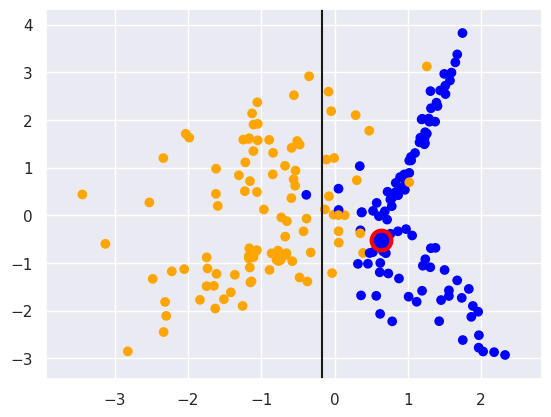

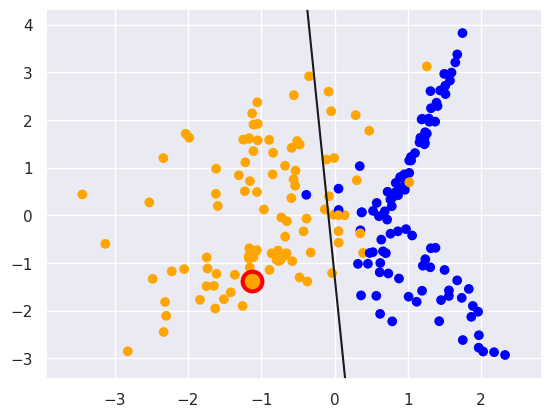

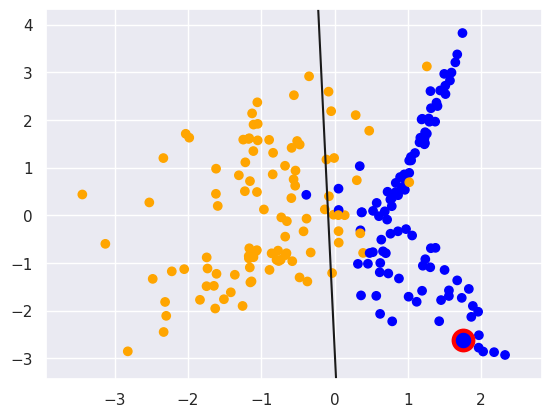

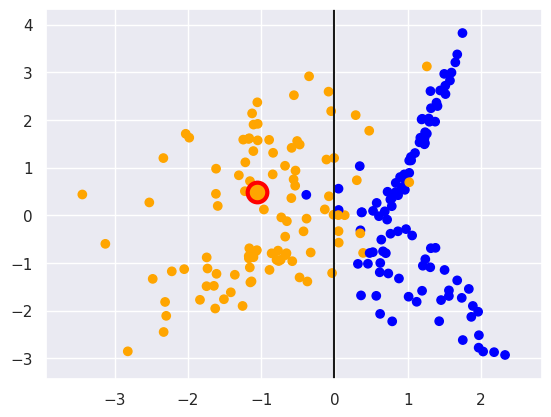

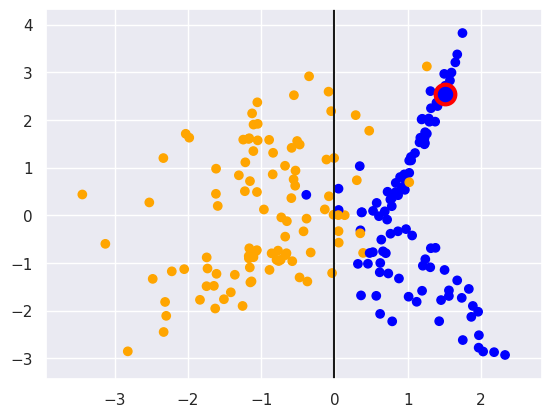

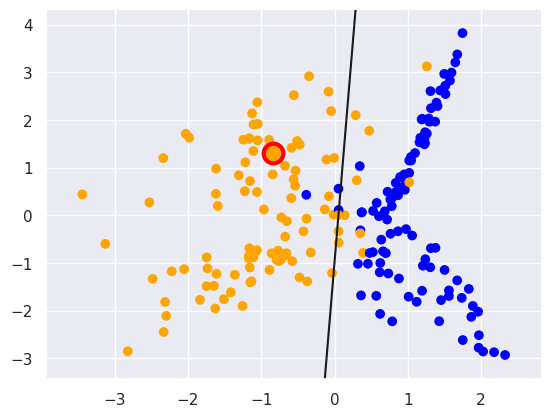

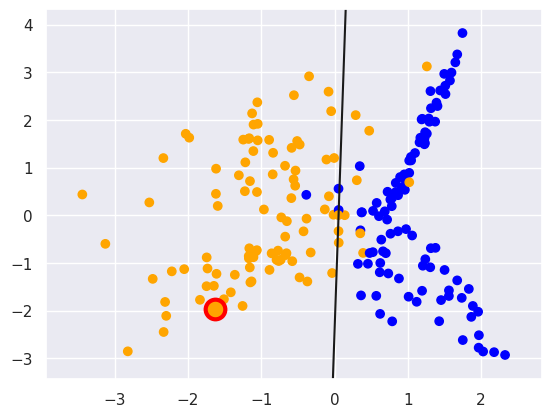

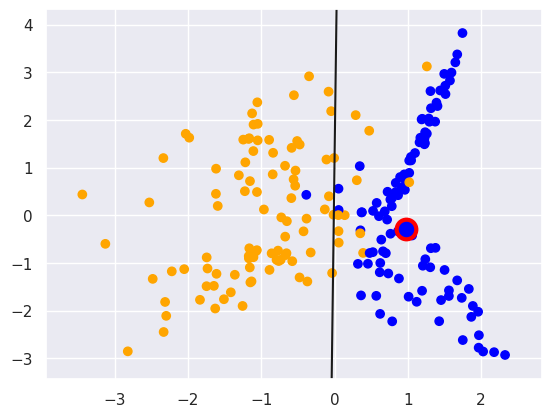

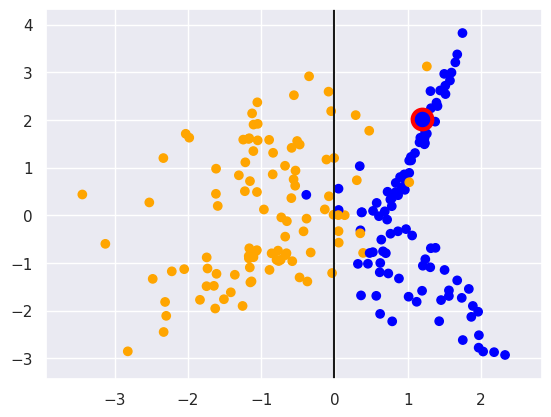

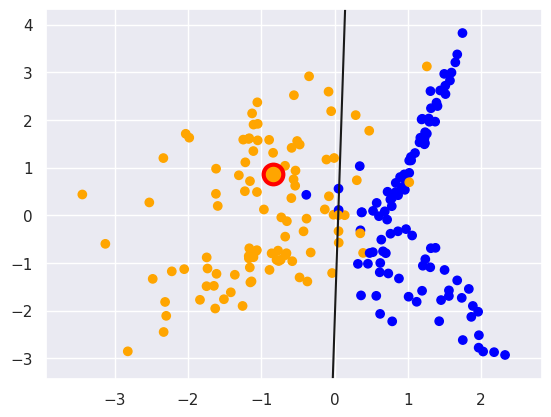

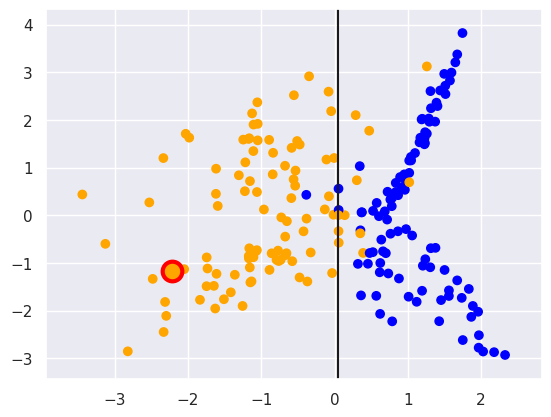

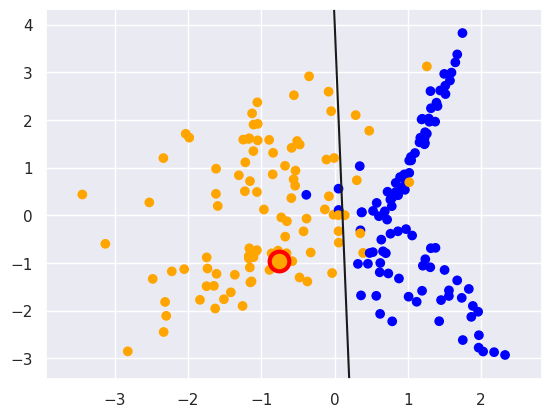

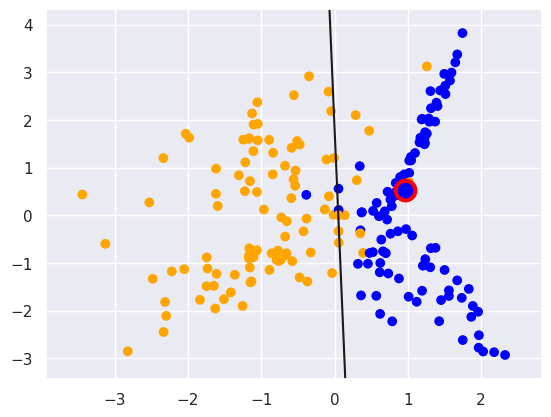

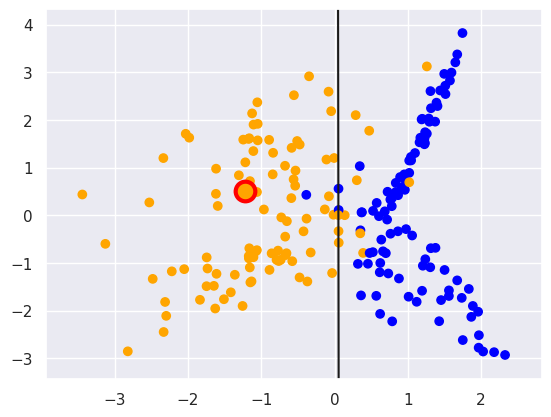

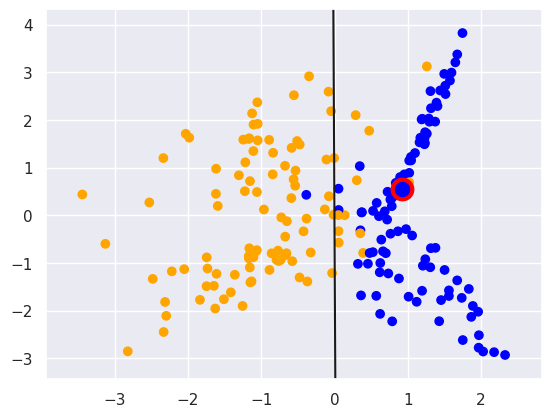

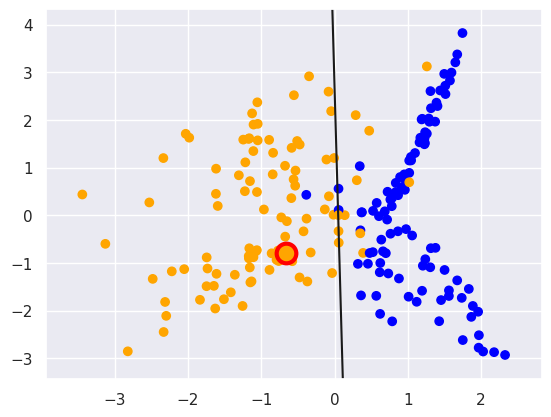

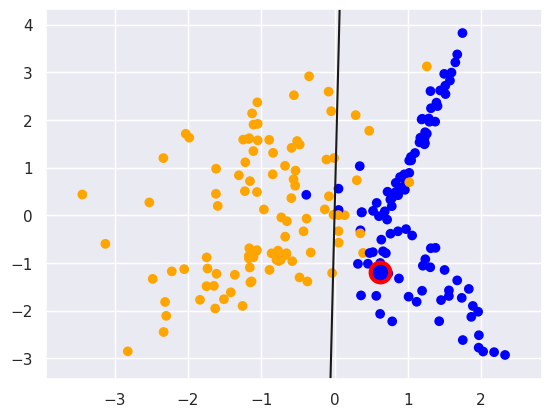

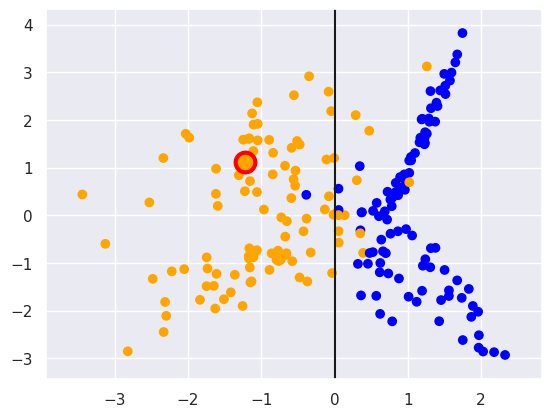

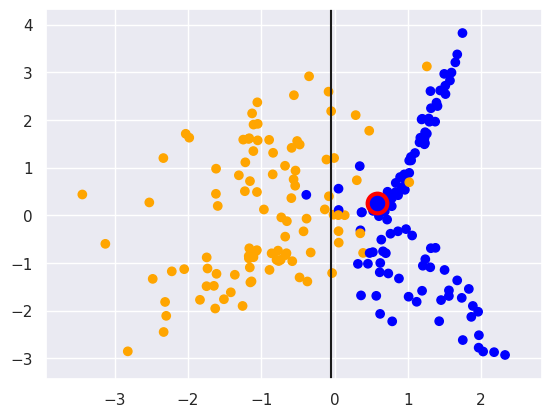

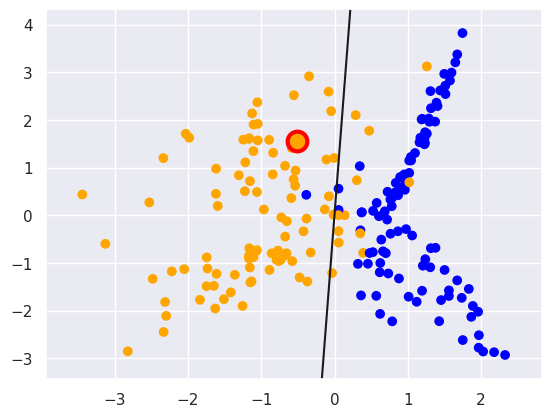

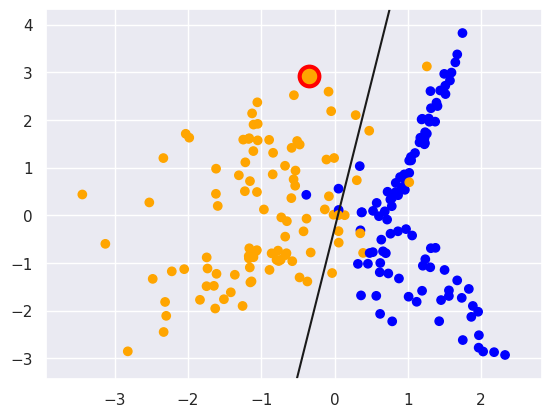

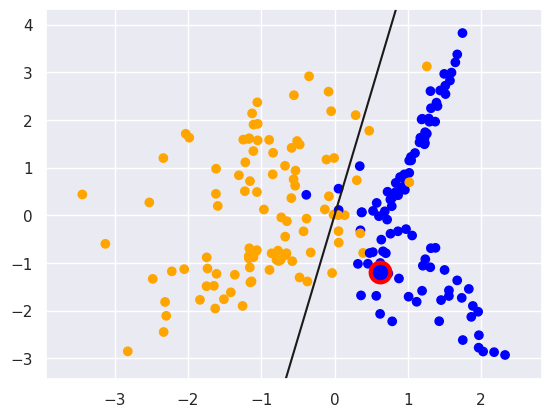

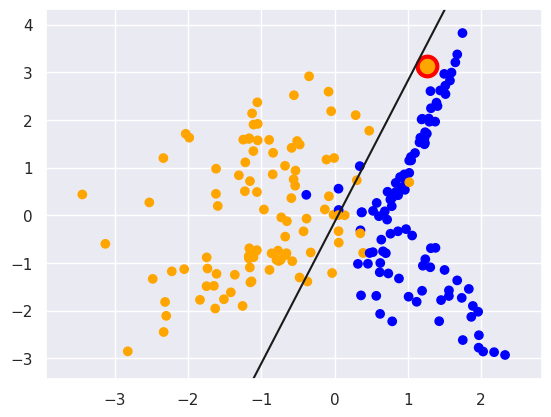

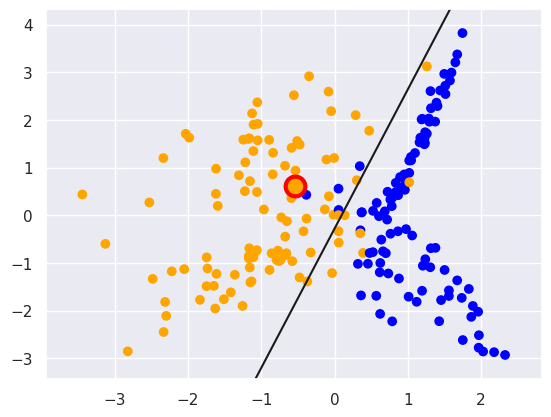

In [150]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l1", alpha=0.5)

coefs = []
for i in get_iter(X.shape[0]):
    clf.partial_fit(X[[i]], y[[i]], classes=np.unique(y))
    coefs.append(clf.coef_.copy())

    plot_sgd_decision(clf, X)
    plt.scatter(X[:, 0], X[:, 1], c=np.where(y > 0, "blue", "orange"))
    plt.scatter(X[[i], 0], X[[i], 1], c=np.where(y[[i]] > 0, "blue", "orange"), edgecolor="red", linewidth=3.0, s=200)
    plt.show()

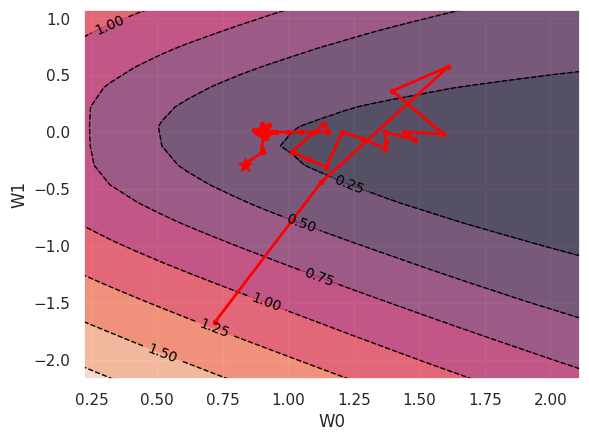

In [151]:
coefs = np.vstack(coefs)
plot_trace(X, y, coefs)

# SGDRegressor

In [126]:
from sklearn.metrics import mean_squared_error

def plot_sgd_predict(model, X):
    xx = np.linspace(X.min() - 0.5, X.max() + 0.5, 20)

    Z = np.empty(xx.shape)
    for i, val in np.ndenumerate(xx):
        Z[i] = model.predict([[val]])[0]

    plt.plot(xx, Z)

def plot_trace(X, y, wei):
    w1_max, w2_max = wei.max(axis=0)
    w1_min, w2_min = wei.min(axis=0)
    w0 = np.linspace(w1_min - 0.5, w1_max + 0.5, 20)
    w1 = np.linspace(w2_min - 0.5, w2_max + 0.5, 20)

    X1, X2 = np.meshgrid(w0, w1)

    vals = np.zeros(shape=(w0.size, w1.size))
    for i, value1 in enumerate(w0):
        for j, value2 in enumerate(w1):
            w_temp = np.array([value1])
            vals[i, j] = mean_squared_error(y, np.dot(X, w_temp) + value2)

    cp = plt.contour(X1, X2, vals.T, colors='black', linestyles='dashed', linewidths=1)
    plt.clabel(cp, inline=1, fontsize=10)
    cp = plt.contourf(X1, X2, vals.T, alpha=0.7)
    plt.plot(wei[:, 0], wei[:, 1], linewidth=2.0, marker='.', color="red")
    plt.scatter(wei[[-1], 0], wei[[-1], 1], marker='*', color="red", s=100)
    plt.xlabel("W0")
    plt.ylabel("Intercept")
    plt.show()

In [127]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

from sklearn.datasets import make_regression, load_iris
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=10, random_state=0)

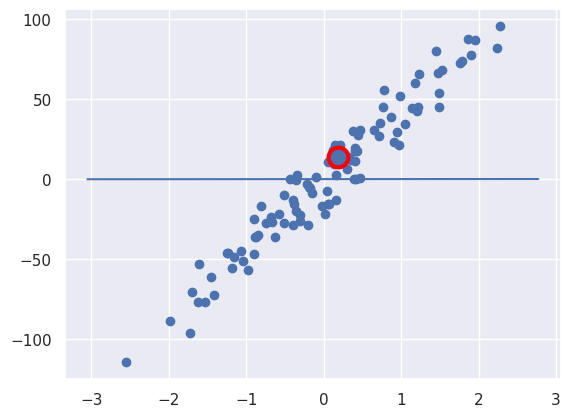

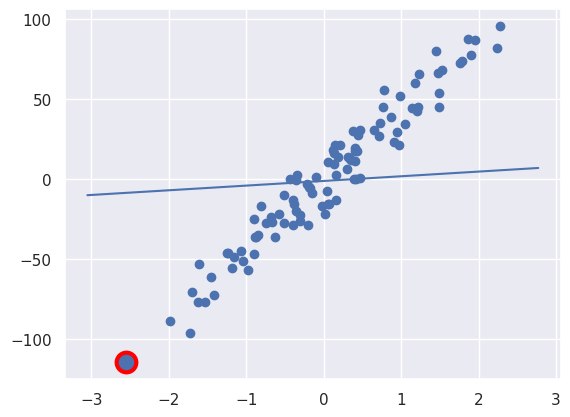

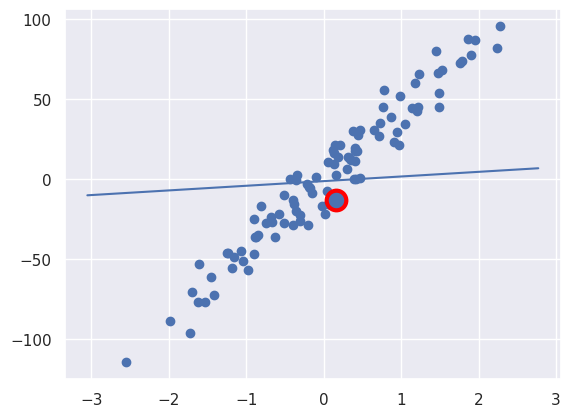

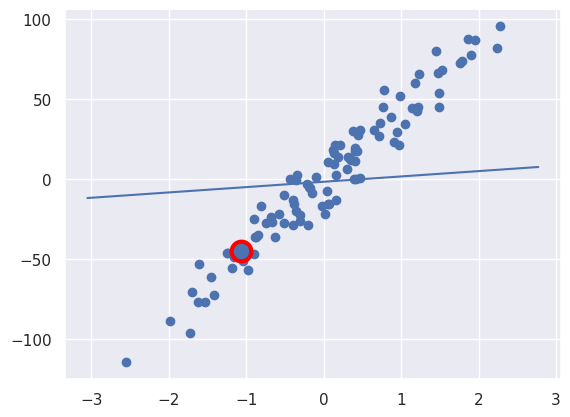

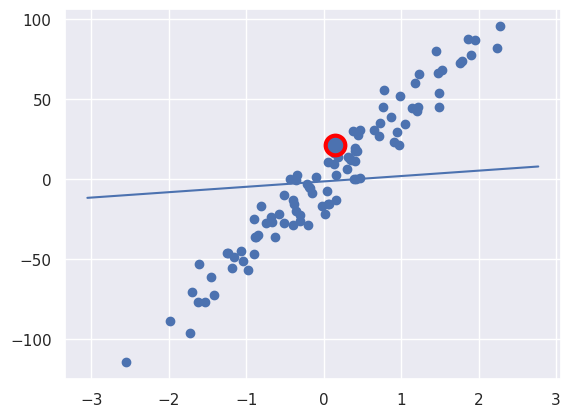

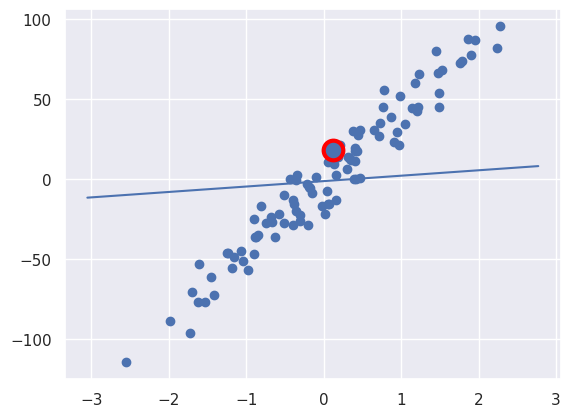

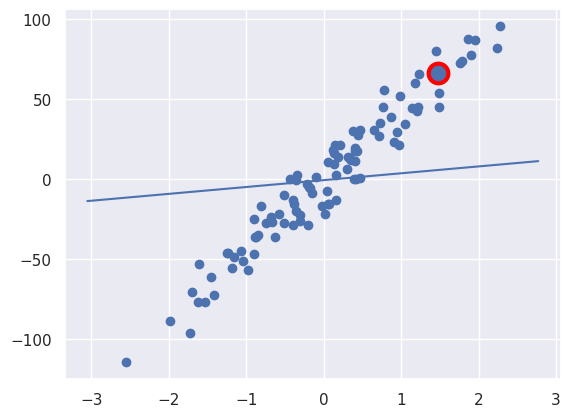

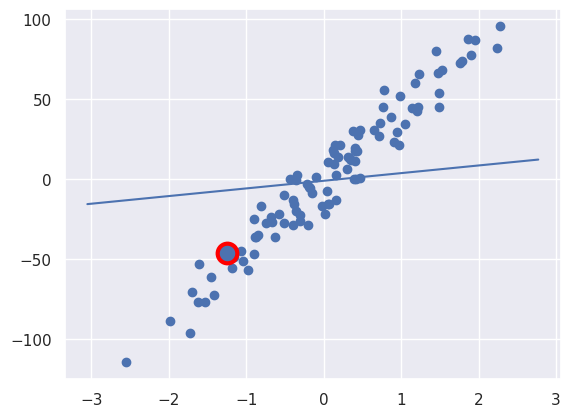

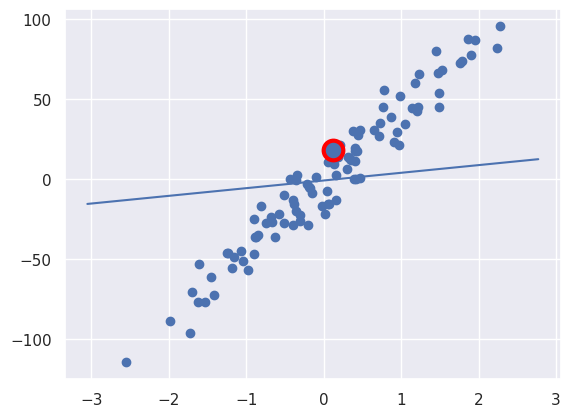

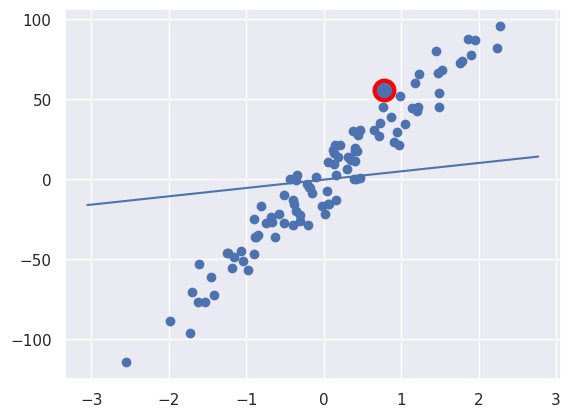

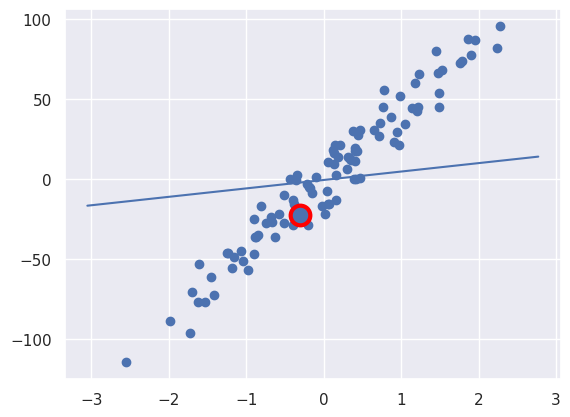

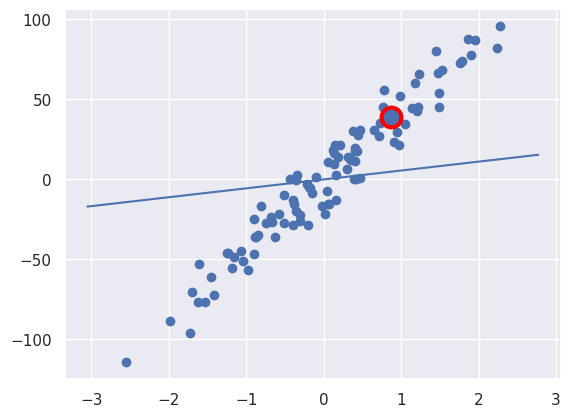

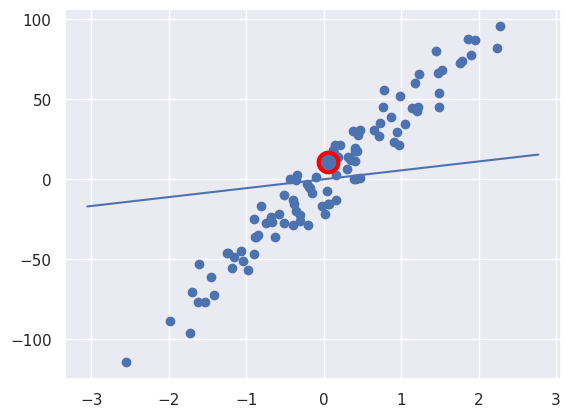

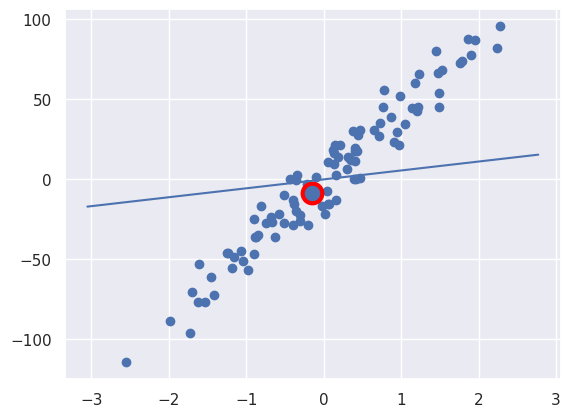

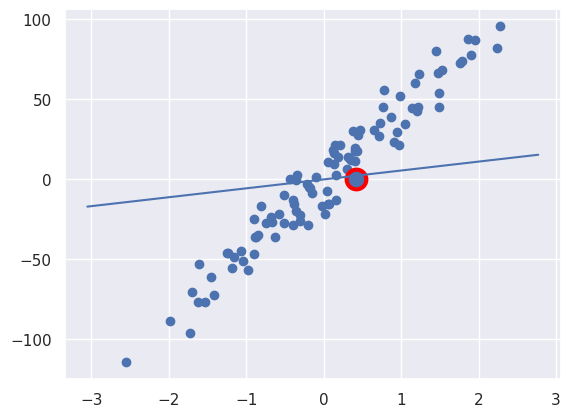

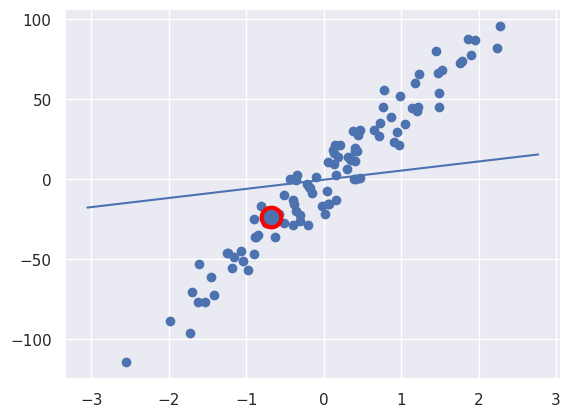

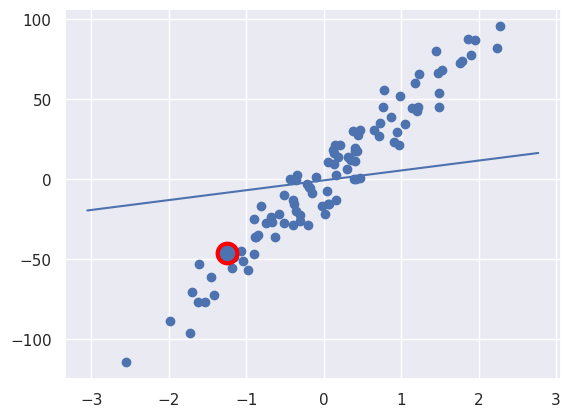

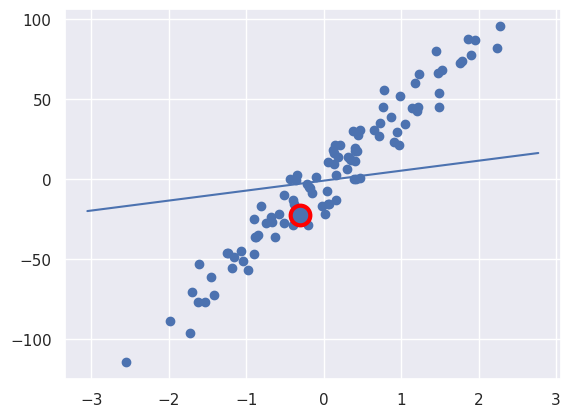

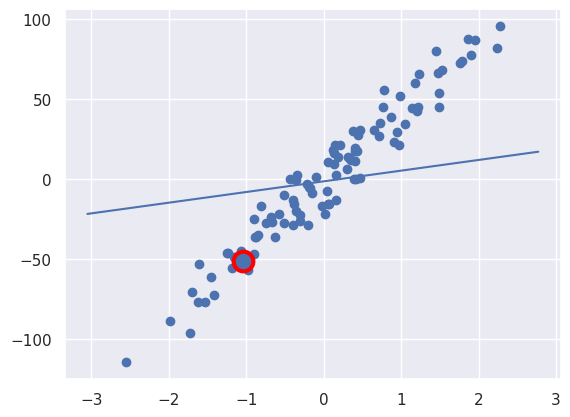

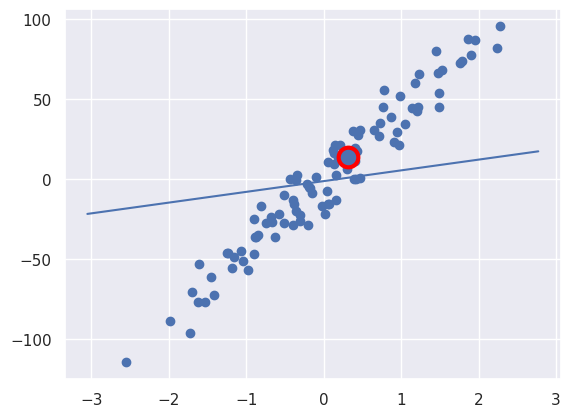

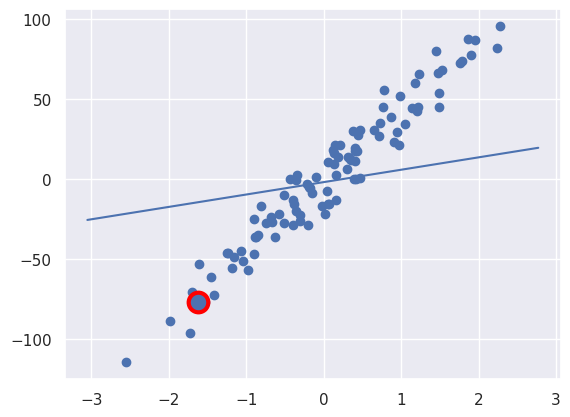

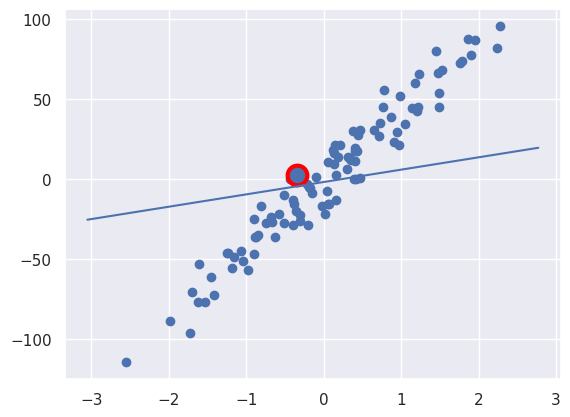

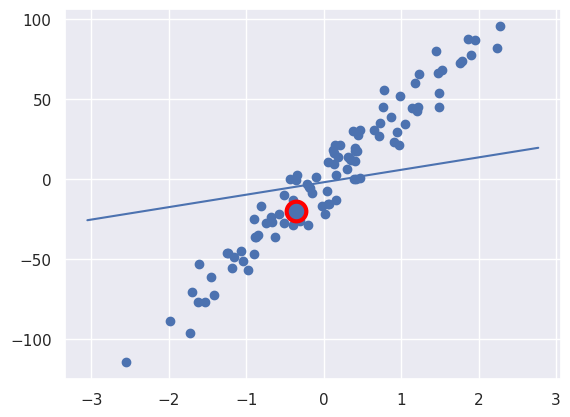

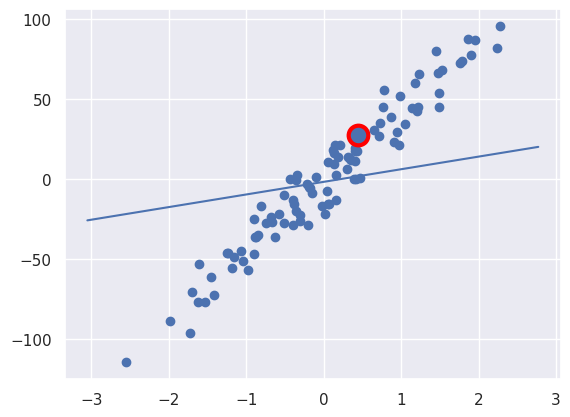

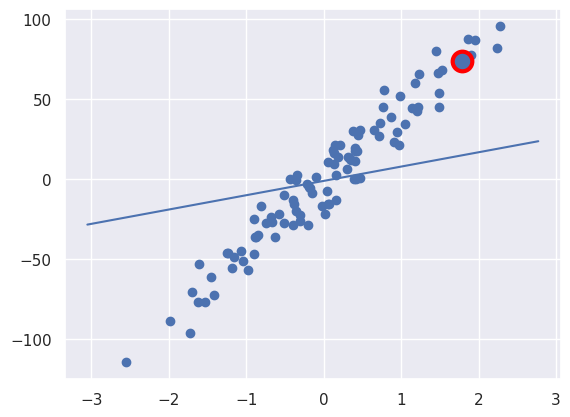

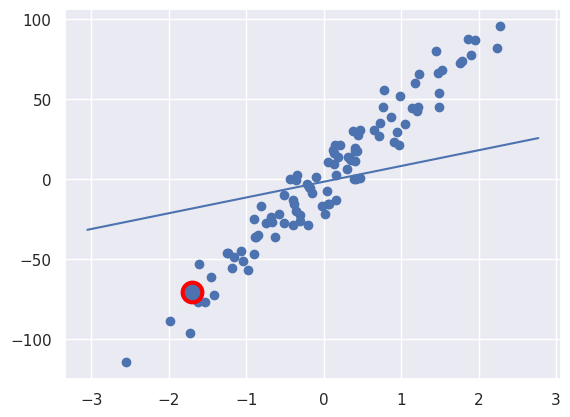

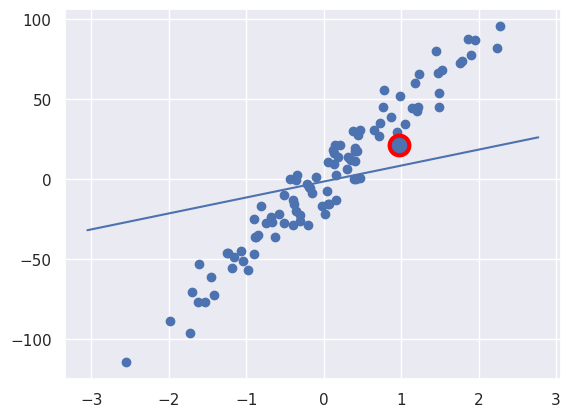

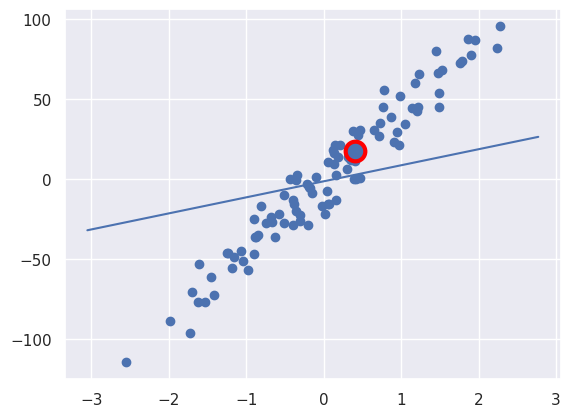

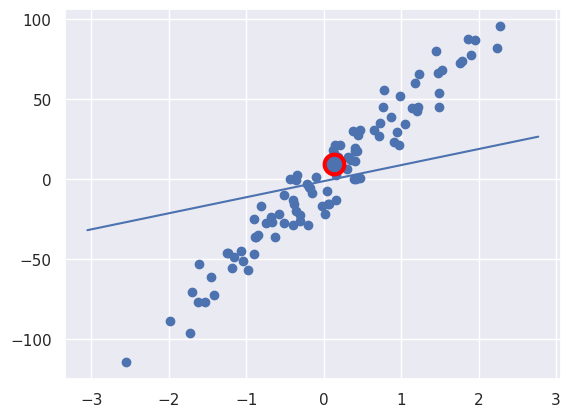

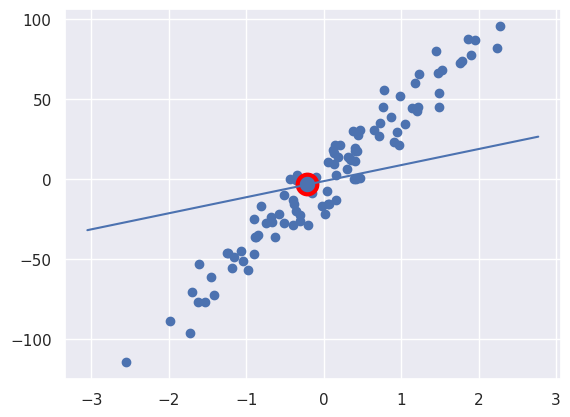

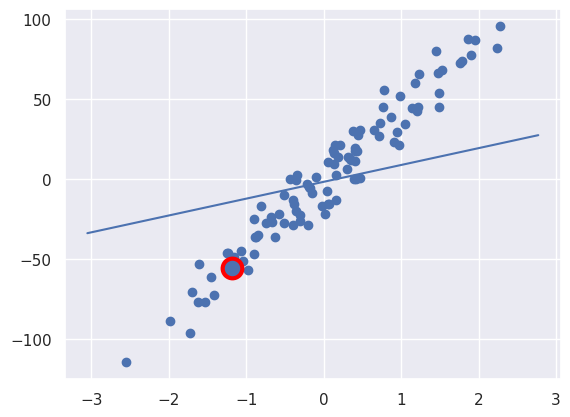

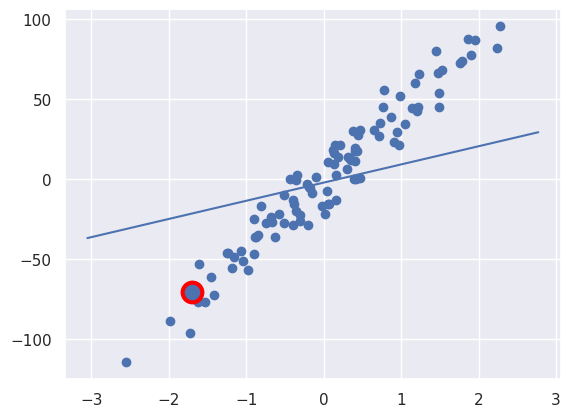

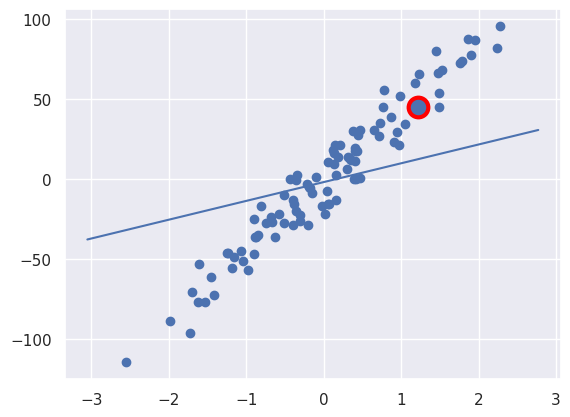

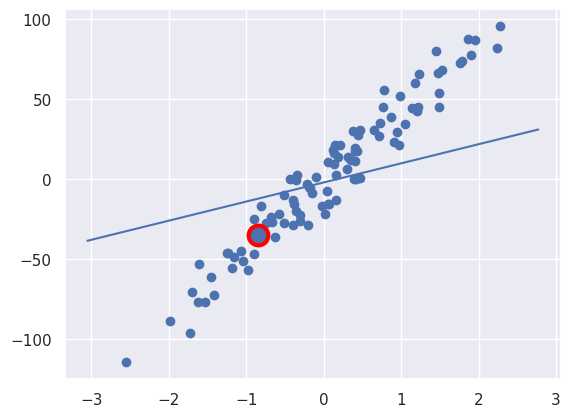

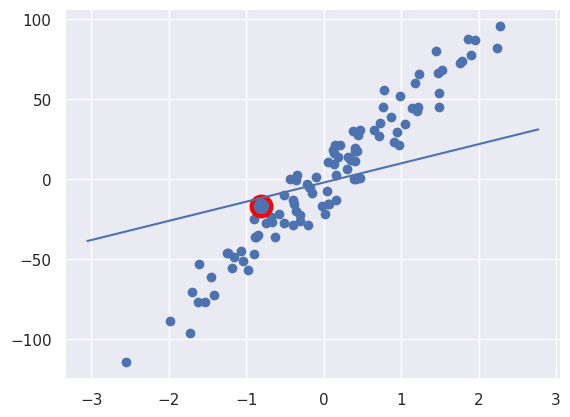

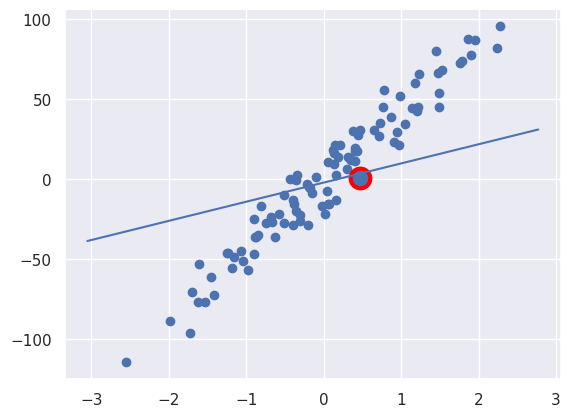

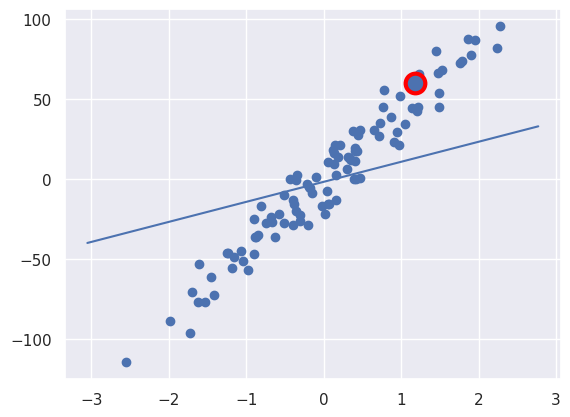

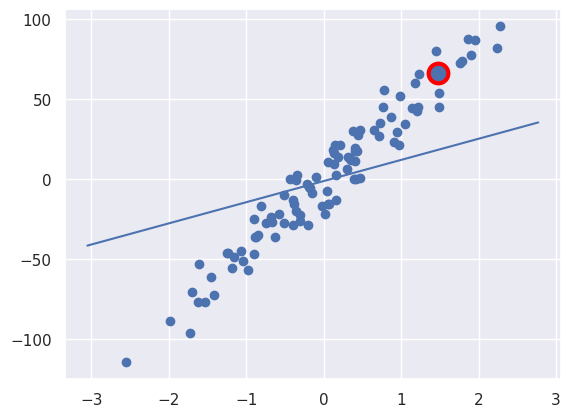

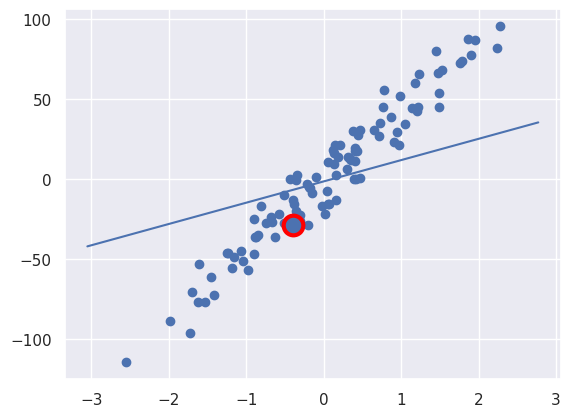

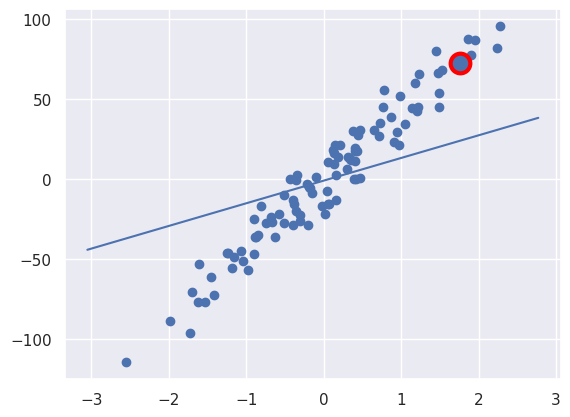

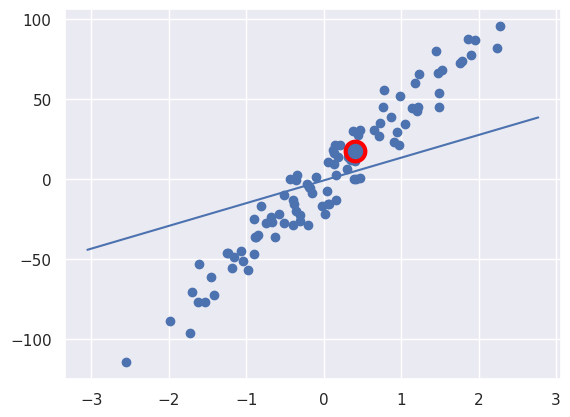

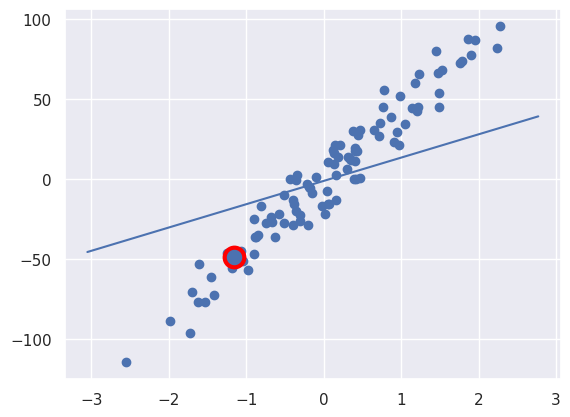

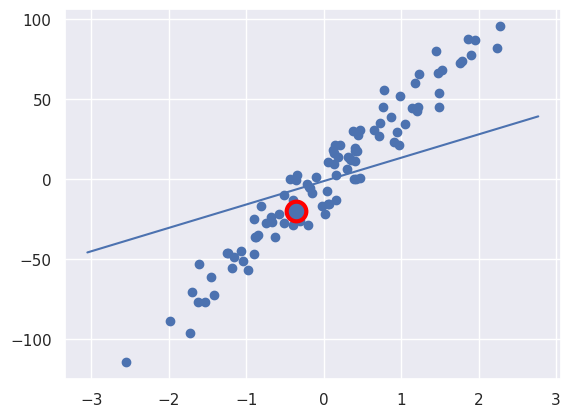

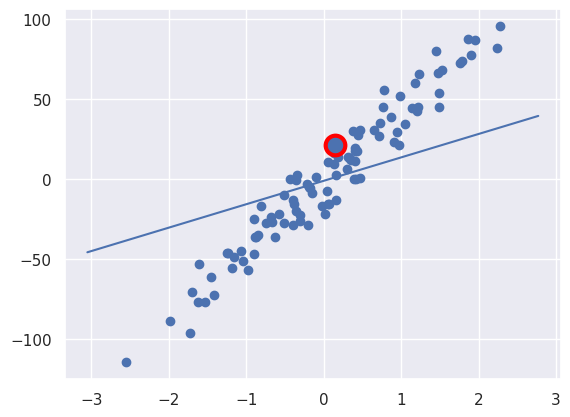

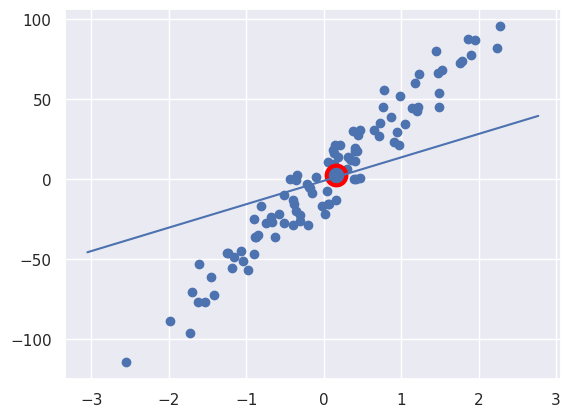

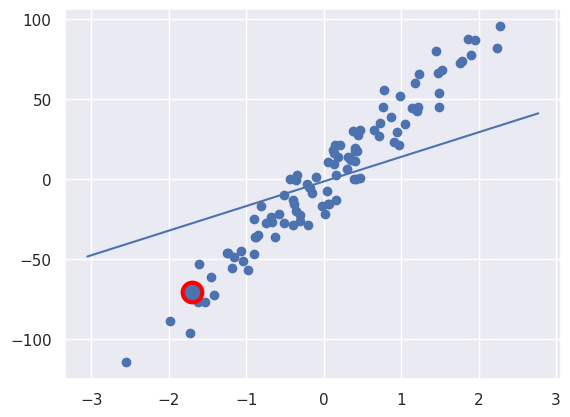

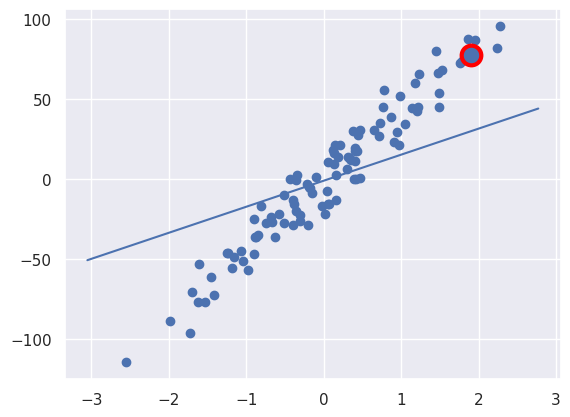

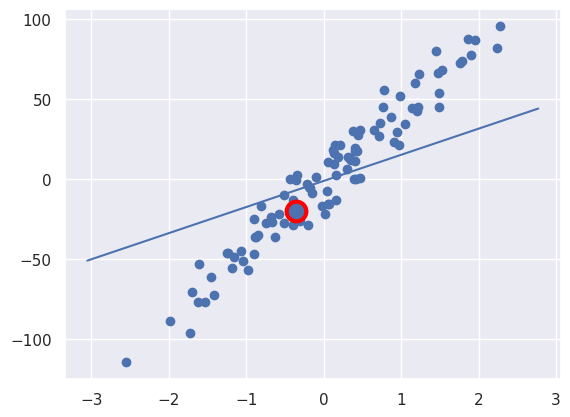

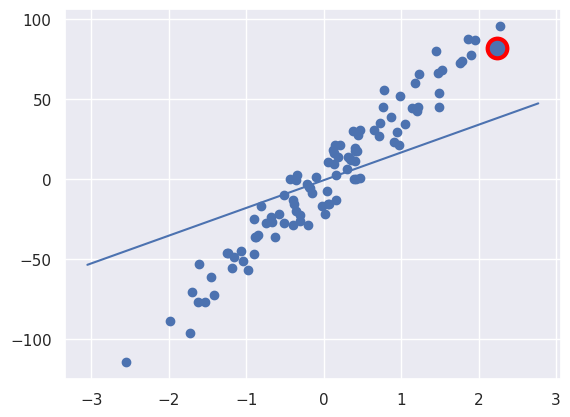

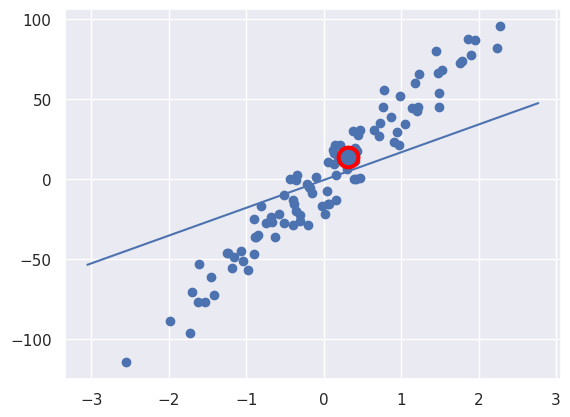

In [130]:
from sklearn.linear_model import SGDRegressor

clf = SGDRegressor(loss="squared_error", penalty="l1", alpha=0.001, power_t=0.01)

coefs = []
for i in get_iter(X.shape[0]):
    clf.partial_fit(X[[i]], y[[i]])
    coefs.append([clf.coef_[0].copy(), clf.intercept_[0].copy()])

    plot_sgd_predict(clf, X)
    plt.scatter(X, y)
    plt.scatter(X[[i]], y[[i]], color='C0', edgecolor="red", linewidth=3.0, s=200)
    plt.show()

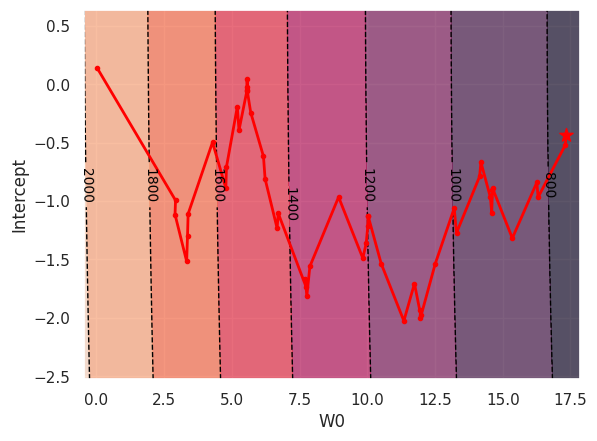

In [131]:
coefs = np.vstack(coefs)
plot_trace(X, y, coefs)